# **Mohammad Nour Alawad - Image Retrieval Mini Project**
> # ***Hand Gesture Recognition***



In [ ]:
from google.colab import files
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
import cv2
import codecs
import json

# **Downloading Dataset**
using Kaggle API to download the dataset to session for saving time.

---



In [ ]:
! pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [00:21<00:00, 45.5MB/s]
100% 2.13G/2.13G [00:21<00:00, 105MB/s] 


In [ ]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

['05', '00', '08', '02', '09', '07', '06', '04', '03', '01']
The different classes that exist in this dataset are:
{'06_index', '05_thumb', '03_fist', '10_down', '08_palm_moved', '07_ok', '01_palm', '04_fist_moved', '09_c', '02_l'}


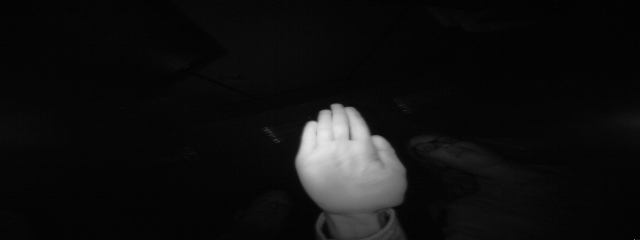

(240, 640, 3)


In [ ]:
path='/content/leapgestrecog/leapGestRecog'
print(os.listdir(path))

folders=os.listdir(path)
folders=set(folders)

different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)

print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

In [ ]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])
print(classes)

{6: 'index', 5: 'thumb', 3: 'fist', 10: 'down', 8: 'palm_moved', 7: 'ok', 1: 'palm', 4: 'fist_moved', 9: 'c', 2: 'l'}


# **Adjusting Dataset**
In the following cell we are **resizing** and **reshaping** all images to the same size and shape.

In [ ]:
w = 160
h = 60

train_image = []
labels = []
dataFrame = pd.DataFrame(columns=['Class','Path'])

for i in folders:
  subdir=set(os.listdir(path+'/'+i))
  for j in subdir:
    images=os.listdir(path+'/'+i+'/'+j)
    for k in images:
      results=dict()
      img = cv2.imread(path+'/'+i+'/'+j+'/'+k , 0)
      img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
      img = img.reshape(60,160,1)
      train_image.append(img)

      labels.append(j)

      dataFrame = dataFrame.append({'Class' : j , 'Path': path+'/'+i+'/'+j+'/'+k },ignore_index=True)
train_image = np.array(train_image)

# **Labels Encoding**

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

y = np.array(dataFrame.iloc[:]['Class'])
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)

print(enc.categories_)

y = enc.transform(y).toarray()
print(y.shape)
print(y[0])

[array(['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
       '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'],
      dtype=object)]
(20000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Building A sequential Model**



In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_further,y_train,y_further = train_test_split(train_image , y , test_size = 0.2, random_state = 42)
x_validate,x_test,y_validate,y_test = train_test_split(x_further , y_further , test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(60, 160,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 156, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 76, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 36, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 18, 64)        0

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
import tensorflow_addons
from tensorflow_addons.metrics import FBetaScore, F1Score
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                        Precision(name='precision'),
                        Recall(name='recall'),
                        F1Score(num_classes=10, name='F1Score')])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(x_validate, y_validate), shuffle=True)

Epoch 1/5
250/250 [==============================] - 21s 42ms/step - loss: 0.6452 - accuracy: 0.9322 - precision: 0.9608 - recall: 0.9126 - F1Score: 0.9322 - val_loss: 0.0066 - val_accuracy: 0.9978 - val_precision: 0.9984 - val_recall: 0.9978 - val_F1Score: 0.9977
Epoch 2/5
250/250 [==============================] - 10s 39ms/step - loss: 0.0271 - accuracy: 0.9947 - precision: 0.9947 - recall: 0.9946 - F1Score: 0.9947 - val_loss: 0.4112 - val_accuracy: 0.9472 - val_precision: 0.9474 - val_recall: 0.9463 - val_F1Score: 0.9494
Epoch 3/5
250/250 [==============================] - 10s 38ms/step - loss: 0.0210 - accuracy: 0.9962 - precision: 0.9964 - recall: 0.9962 - F1Score: 0.9962 - val_loss: 1.2368e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_F1Score: 1.0000
Epoch 4/5
250/250 [==============================] - 10s 39ms/step - loss: 0.0077 - accuracy: 0.9985 - precision: 0.9985 - recall: 0.9985 - F1Score: 0.9985 - val_loss: 1.1731e-06 - val_accuracy: 1.0000

# **Model evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test, batch_size=64, verbose=1)

y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_bool, y_pred_bool)
print(cm)

13/13 [==============================] - 0s 25ms/step
[[85  0  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0  0]
 [ 0  0 82  0  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  0  0  0]
 [ 0  0  0  0 65  0  0  0  0  0]
 [ 0  0  0  0  0 85  0  0  0  0]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0  0  0 86]]


In [ ]:
cr = classification_report(y_test_bool, y_pred_bool)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        73
           8       1.00      1.00      1.00        77
           9       1.00      1.00      1.00        86

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
model.save('model.h5')

In [ ]:
acc = model.evaluate(x_test,y_test, verbose=1)
print("Accuracy:" + str(acc[1]))

25/25 [==============================] - 1s 11ms/step - loss: 7.8624e-07 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - F1Score: 1.0000
Accuracy:1.0


# **Tests on the training set**

In [ ]:
class_names = ["palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c", "down"] 

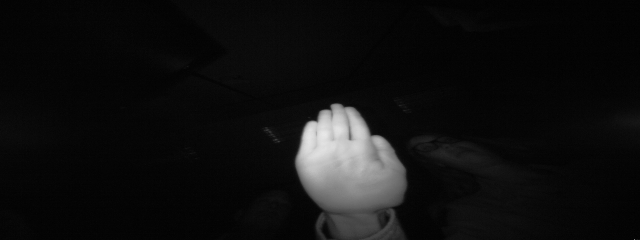

palm :  100.0 %
l :  0.0 %
fist :  0.0 %
fist_moved :  0.0 %
thumb :  0.0 %
index :  0.0 %
ok :  0.0 %
palm_moved :  0.0 %
c :  0.0 %
down :  0.0 %
palm


In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/leapGestRecog/00/01_palm/frame_00_01_0002.png',0)
cv2_imshow(img)
img = cv2.resize(img,(int(160),int(60)),interpolation = cv2.INTER_AREA)
img = img.reshape(1,60,160,1)
pred = model.predict(img)

for i in range(10):
  print (class_names[i], ": ", round(pred[0][i] * 100, 2), "%")
print(class_names[np.argmax(pred)])

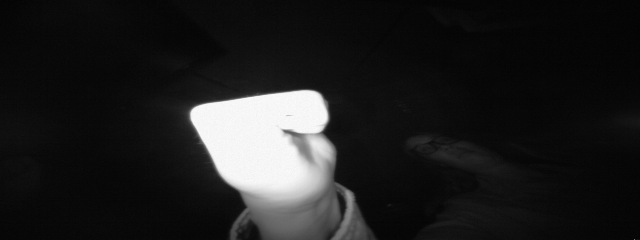

palm :  0.0 %
l :  0.0 %
fist :  0.0 %
fist_moved :  100.0 %
thumb :  0.0 %
index :  0.0 %
ok :  0.0 %
palm_moved :  0.0 %
c :  0.0 %
down :  0.0 %
fist_moved


In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/leapgestrecog/leapGestRecog/00/04_fist_moved/frame_00_04_0003.png',0)
cv2_imshow(img)
img = cv2.resize(img,(int(160),int(60)),interpolation = cv2.INTER_AREA)

ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

imgf=np.asarray(imgf,dtype=np.float64)
imgf = imgf.reshape(1,60,160,1)

pred = model.predict(imgf)

for i in range(10):
  print (class_names[i], ": ", round(pred[0][i] * 100, 2), "%")
print(class_names[np.argmax(pred)])

# **Exporting model as a JavaScript Library** 

In [ ]:
!pip install tensorflowjs

!mkdir models
!tensorflowjs_converter --input_format keras model.h5 models/

!zip -r models.zip models

     |████████████████████████████████| 77 kB 3.3 MB/s 
  adding: models/ (stored 0%)
  adding: models/model.json (deflated 81%)
  adding: models/group1-shard1of1.bin (deflated 7%)
